<a href="https://colab.research.google.com/github/LukmanovaLiliya/-Python-Data-Science-/blob/LukmanovaLiliya-patch-1/lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Тема “Обучение без учителя”**

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

boston.keys()

data = boston['data']
target = boston['target']
feature_names = boston['feature_names']

In [3]:
X = pd.DataFrame(data, columns=feature_names)

In [4]:
y = pd.DataFrame(target, columns=['price'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Масштабируйте данные с помощью StandardScaler. 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [9]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:{}'.format(X_train_scaled.shape))
print('После:{}'.format(X_train_tsne.shape))

До:(404, 13)
После:(404, 2)


Юля, объясни, пожалуйста, почему без слова print, у меня выводится только последняя строка "После", а "До" не выводится.

Постройте диаграмму рассеяния на этих данных.

In [11]:
import matplotlib.pyplot as plt

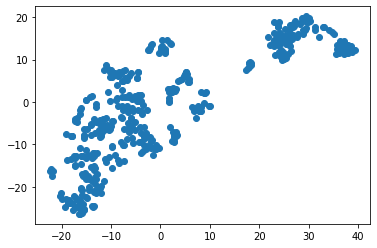

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [32]:
from sklearn.cluster import KMeans

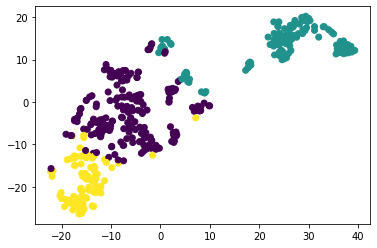

In [33]:
kmeans = KMeans(n_clusters=3,  random_state=42, max_iter=100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [34]:
print('Средние значения price:')
print('Кластер 1: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 3: {}'.format(y_train[labels_train == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 1: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 3: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


Средние значения price:
Кластер 1: price    24.958115
dtype: float64
Кластер 2: price    16.165354
dtype: float64
Кластер 3: price    27.788372
dtype: float64
Средние значения CRIM:
Кластер 1: 0.42166020942408367
Кластер 2: 10.797028425196853
Кластер 3: 0.07356558139534886


**Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [23]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

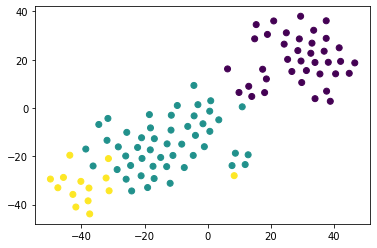

In [25]:
kmeans = KMeans(n_clusters=3,  random_state=42, max_iter=100)

labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [30]:
print('Средние значения price:')
print('Кластер 1: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 3: {}'.format(y_test[labels_test == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 1: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 3: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 1: price    16.710526
dtype: float64
Кластер 2: price    21.652
dtype: float64
Кластер 3: price    33.871429
dtype: float64
Средние значения CRIM:
Кластер 1: 9.419181842105264
Кластер 2: 0.2244212
Кластер 3: 0.08618571428571427
